In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [16]:
data_frame = pd.read_csv("one_year_data.csv")
data_frame = data_frame.iloc[:, 1:490]

In [17]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = data_frame.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = data_frame.pct_change().std() * sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
X = np.where(np.isnan(data), 0, data)

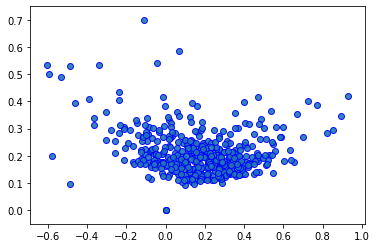

In [18]:
plt.scatter(X[:,0], X[:,1], alpha=0.9, edgecolors='b')

0.42366565802260636


Text(0.5, 1.0, 'GMM Clustering for Stock Data')

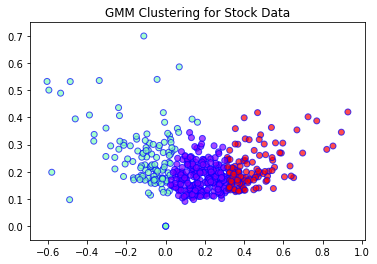

In [40]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
gmm = GaussianMixture(n_components=3,  covariance_type='spherical', random_state=0).fit(X)
labels = gmm.predict(X)
silhouette_avg = silhouette_score(X, labels)
print(silhouette_avg)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title("GMM Clustering for Stock Data")
#plot_gmm(gmm,X)
#Error TypeError: cannot unpack non-iterable numpy.float64 object
#for plotting ellipse